<a href="https://colab.research.google.com/github/ChinnamLakshmiDurga/Image-Recognition-with-Tensorflow/blob/main/Dog_and_cCat_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import your libraries
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [ ]:
# Download a dataset of cats and dogs
!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2021-09-25 15:48:53--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.78.216.154, 2600:140e:6:b8d::e59, 2600:140e:6:ba1::e59
Connecting to download.microsoft.com (download.microsoft.com)|23.78.216.154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.68M   114MB/s    in 6.8s    

2021-09-25 15:49:00 (115 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824894548/824894548]



In [ ]:
print(len(os.listdir('/tmp/PetImages/Cat/')))
print(len(os.listdir('/tmp/PetImages/Dog/')))

12501
12501


In [ ]:
# Make the Directories to split the pictures and set up for image data generator
try:
  os.makedirs('/tmp/cats_v_dogs/')
  os.makedirs('/tmp/cats_v_dogs/training/cats/')
  os.makedirs('/tmp/cats_v_dogs/training/dogs/')
  os.makedirs('/tmp/cats_v_dogs/testing/cats/')
  os.makedirs('/tmp/cats_v_dogs/testing/dogs/')

except OSError:
    pass

In [ ]:
# Function to split the data into the directories
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
  orig_files = os.listdir(SOURCE)

  # Shuffling files
  random.shuffle(orig_files)

  # Get the sizes of training and test sets
  train_size = int(len(orig_files) * SPLIT_SIZE)

  # Designate the files to their respective sets
  train_files = orig_files[:train_size]
  test_files = orig_files[train_size:]

  # Copy over the training files
  for filename in train_files:
    src_path = os.path.join(SOURCE, filename)
    if os.path.getsize(src_path) > 0:
      copyfile(src_path, os.path.join(TRAINING, filename))

  # Copy over the testing files
  for filename in test_files:
    src_path = os.path.join(SOURCE, filename)
    if os.path.getsize(src_path) > 0:
      copyfile(src_path, os.path.join(TESTING, filename))

CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats_v_dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats_v_dogs/testing/cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats_v_dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats_v_dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

In [ ]:
print(len(os.listdir('/tmp/cats_v_dogs/training/cats/')))
print(len(os.listdir('/tmp/cats_v_dogs/training/dogs/')))
print(len(os.listdir('/tmp/cats_v_dogs/testing/cats/')))
print(len(os.listdir('/tmp/cats_v_dogs/testing/dogs/')))

11249
11249
1251
1251


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# Initializing data generators
TRAINING_DIR = '/tmp/cats_v_dogs/training/'
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        TRAINING_DIR,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

VALIDATION_DIR = '/tmp/cats_v_dogs/testing/'
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = train_datagen.flow_from_directory(
        VALIDATION_DIR,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 22496 images belonging to 2 classes.
Found 2502 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator,
                              epochs=15,
                              verbose=1,
                              validation_data=validation_generator)

Epoch 1/15
  18/1125 [..............................] - ETA: 1:26 - loss: 0.7031 - accuracy: 0.4694

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

1125/1125 [==============================] - 134s 90ms/step - loss: 0.5826 - accuracy: 0.6778 - val_loss: 0.4870 - val_accuracy: 0.7680
Epoch 2/15
1125/1125 [==============================] - 104s 92ms/step - loss: 0.4619 - accuracy: 0.7783 - val_loss: 0.4468 - val_accuracy: 0.7880
Epoch 3/15
1125/1125 [==============================] - 103s 91ms/step - loss: 0.4059 - accuracy: 0.8133 - val_loss: 0.4722 - val_accuracy: 0.7732
Epoch 4/15
1125/1125 [==============================] - 103s 92ms/step - loss: 0.3627 - accuracy: 0.8387 - val_loss: 0.3837 - val_accuracy: 0.8228
Epoch 5/15
1125/1125 [==============================] - 100s 89ms/step - loss: 0.3254 - accuracy: 0.8577 - val_loss: 0.3539 - val_accuracy: 0.8428
Epoch 6/15
1125/1125 [==============================] - 100s 89ms/step - loss: 0.2943 - accuracy: 0.8738 - val_loss: 0.4091 - val_accuracy: 0.8160
Epoch 7/15
1125/1125 [==============================] - 100s 89ms/step - loss: 0.2619 - accuracy: 0.8901 - val_loss: 0.3733 - val

Text(0.5, 1.0, 'Training and validation loss')

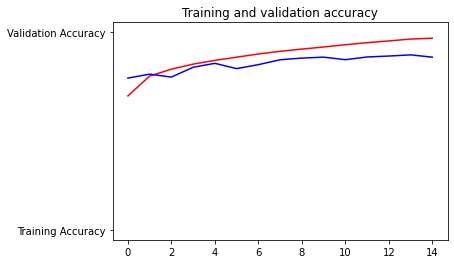

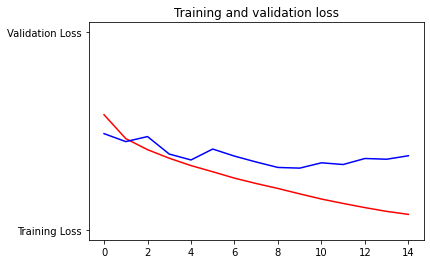

In [ ]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')
